# Fictitious Names

### Introduction:
This is modified exercise of [Chris Albon](http://chrisalbon.com/).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### We can create three DataFrames based on the following dictionaries

In [2]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
        'test_score': [51, 15, 15, 61, 16, 14, 22, 15, 1, 61, 16]}

# Assign each to a variable called data1, data2, data3 (from dictionary to DataFrame)
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_score'])

### 1. Use info() to check the types of variables in three DataFrames.

In [3]:
# check the data 1,2,3 information
data1.info()
data2.info()
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  5 non-null      object
 1   first_name  5 non-null      object
 2   last_name   5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  5 non-null      object
 1   first_name  5 non-null      object
 2   last_name   5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  11 non-null     object
 1   test_score  11 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 308.0+

### 2. Concatenate data1 and data2 along rows and assign it to data12. Check the indices and reset it.

In [4]:
frames = [data1, data2]
#Concatenate the data1 and 2 by rows and save in the data12
data12 = pd.concat(frames, axis=0)
data12

#reset the index
data12 = data12.reset_index()


### 3. From data12, select the rows that have the duplicated 'subject_id' on both data1 and data2

In [5]:
#concatenate data 1 and 2
data12 = pd.concat([data1, data2])
#select rows have duplicated subject id from data 1 and 2
data12[data12.duplicated(subset=['subject_id'],keep=False)]



,subject_id,first_name,last_name
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black


### 4. Concatenate data1 and data2 along columns and assign it to data12_col

In [6]:
frames = [data1, data2]
#Concatenate the data1 and 2 by column and save in the data12_col
data12_col = pd.concat(frames, axis=1)
data12_col


,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


### 5. Merge data12 and data3 along the subject_id value and assign it to all_data

In [7]:
#check the dataset 
print(data12)
print(data3)

#Merge the data12 and 3 along the subject_id and save into the all_data
all_data = pd.merge(data12, data3, on="subject_id" )
print(all_data)

  subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches
0          4      Billy    Bonder
1          5      Brian     Black
2          6       Bran   Balwner
3          7      Bryce     Brice
4          8      Betty    Btisan
   subject_id  test_score
0           1          51
1           2          15
2           3          15
3           4          61
4           5          16
5           6          14
6           7          22
7           8          15
8           9           1
9          10          61
10         11          16
  subject_id first_name last_name  test_score
0          1       Alex  Anderson          51
1          2        Amy  Ackerman          15
2          3      Allen       Ali          15
3          4      Alice      Aoni          61
4          5     Ayoung   Atiches          16
5          4      Billy    Bonder     

### 6. From all_data, select the rows whose test_score is greater than 10 and less than 60.

In [8]:
#set the condition test_score that greater 10 and less than 60 
all_data[ (all_data.test_score > 10) & (all_data.test_score < 60) ] 


,subject_id,first_name,last_name,test_score
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
4,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,6,Bran,Balwner,14
8,7,Bryce,Brice,22
9,8,Betty,Btisan,15


### 7. From all_data, sort rows by test_score in increasing order.

In [9]:
#sort data by increasing order 
all_data.sort_values(by='test_score')

,subject_id,first_name,last_name,test_score
7,6,Bran,Balwner,14
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
9,8,Betty,Btisan,15
4,5,Ayoung,Atiches,16
6,5,Brian,Black,16
8,7,Bryce,Brice,22
0,1,Alex,Anderson,51
3,4,Alice,Aoni,61
5,4,Billy,Bonder,61


### 8. Merge all values in data1 and data2, keeping observations with matching subject_id from both sides.

In [10]:
#check the dataset
print(data1)
print(data2)

#merge all values from data 1 and 2, observations with matching subject_id
all_data2 = pd.merge(data1, data2, on=["subject_id", "subject_id"] )
print(all_data2)

  subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches
  subject_id first_name last_name
0          4      Billy    Bonder
1          5      Brian     Black
2          6       Bran   Balwner
3          7      Bryce     Brice
4          8      Betty    Btisan
  subject_id first_name_x last_name_x first_name_y last_name_y
0          4        Alice        Aoni        Billy      Bonder
1          5       Ayoung     Atiches        Brian       Black


### 9. In all_data, there are two groups of subjects whose names start with 'A' and 'B'. Compute the average test scores of two groups.

In [11]:
# Filter rows where 'first_name' starts with 'A'
name_A = all_data[all_data["first_name"].str.startswith('A', na=False)]
# Filter rows where 'first_name' starts with 'B'
name_B = all_data[all_data["first_name"].str.startswith('B', na=False)]

print(name_A['test_score'].mean())
print(name_B['test_score'].mean())

31.6
25.6


### 10. Draw a summary plot of test_score in all_data

  subject_id first_name last_name  test_score
0          1       Alex  Anderson          51
1          2        Amy  Ackerman          15
2          3      Allen       Ali          15
3          4      Alice      Aoni          61
4          5     Ayoung   Atiches          16
5          4      Billy    Bonder          61
6          5      Brian     Black          16
7          6       Bran   Balwner          14
8          7      Bryce     Brice          22
9          8      Betty    Btisan          15


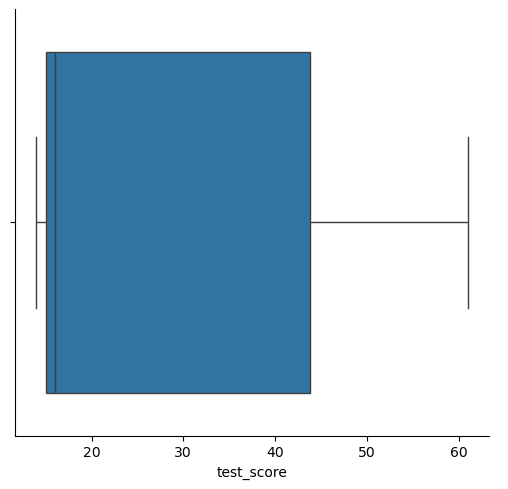

In [12]:
#check the data 
print(all_data)

import numpy as np
import matplotlib.pyplot as plt
#for plot 
import seaborn as sns 

#build the plot by test_score from all_data
sns.catplot(x="test_score",kind="box", data=all_data)